

---


***Hand-Written-Digit-Recognition (Deep Learning Model)***

***Saurabh Gupta***



---



**Importing all the necessary Modules and Libraries for our Model/Project**

In [ ]:
#Importing all the necessary Modules and Libraries for our Model/Project
import pandas as pd
import numpy as np

import cv2 as cv2
import glob #helps to access all the files in a folder
import matplotlib.pyplot as plt

import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from sklearn.model_selection import train_test_split



#Import this library in colab only to use cv2_imshow() function to display image
from google.colab.patches import cv2_imshow

#Add/Change the folder path in which this code resides
this_folder = '/content/drive/MyDrive/Projects/Web-Development/Digit-Recognizer/'
digit_img_orig = 'Digits/Original/'
digit_img_rsz_test = 'Digits/Test-Resize/'
digit_img_test = 'Digits/Test/'

#Default no of images is 1
n_img = 1

In [ ]:
np.random.seed(1212)

In [ ]:
#Use when you are using Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Function to access and then store all the image files (with given extension) from the given folder
def getAllImage(folder_path,extension) :
  all_img = []
  folder_path = folder_path + "/*." + extension
  for file in glob.glob(folder_path):
    img = cv2.imread(file)
    all_img.append(img)
  return all_img

#Accessing all the files in the Digits folder
dig_img = []
folder_path = this_folder + digit_img_orig

dig_img = getAllImage(folder_path,"jpg")

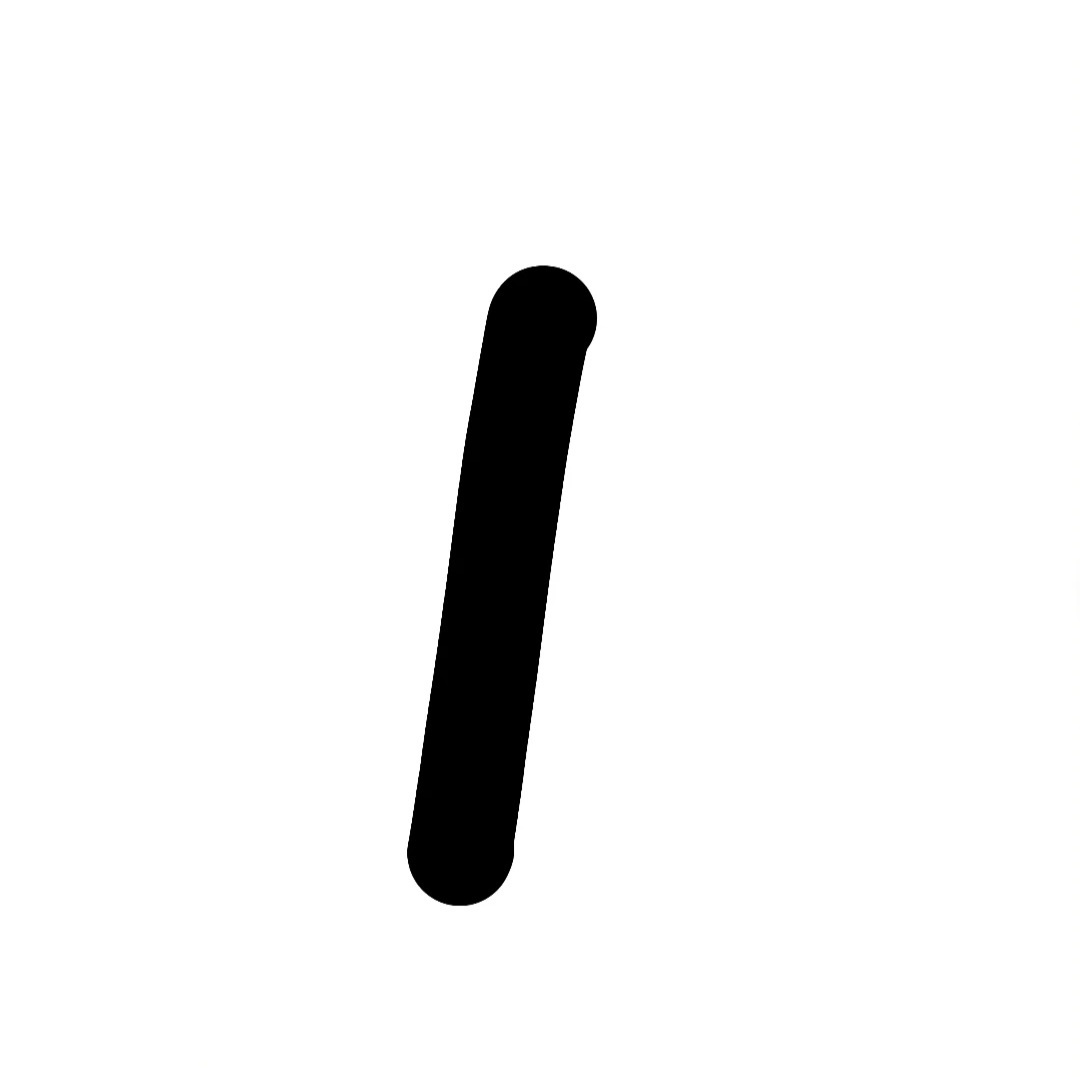

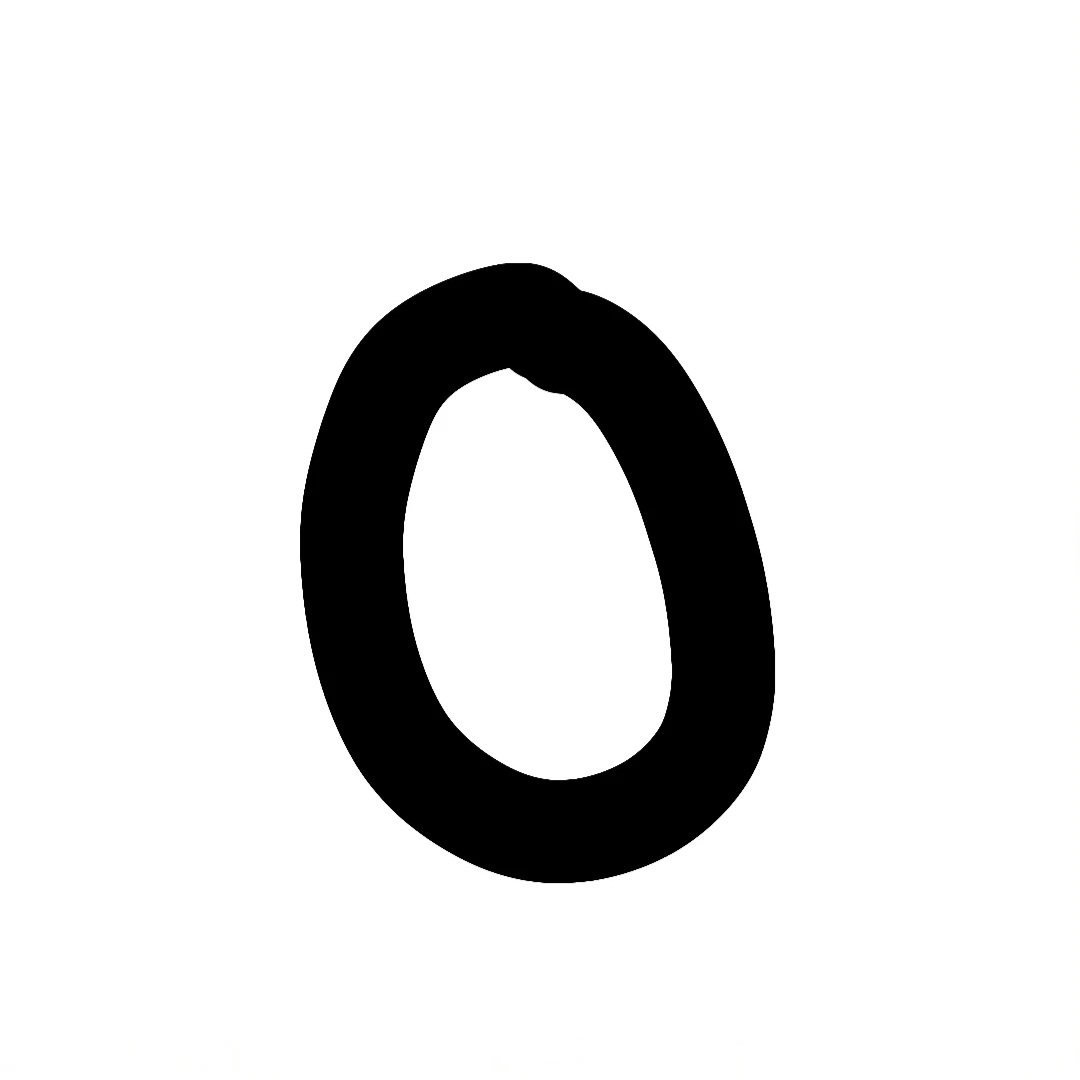

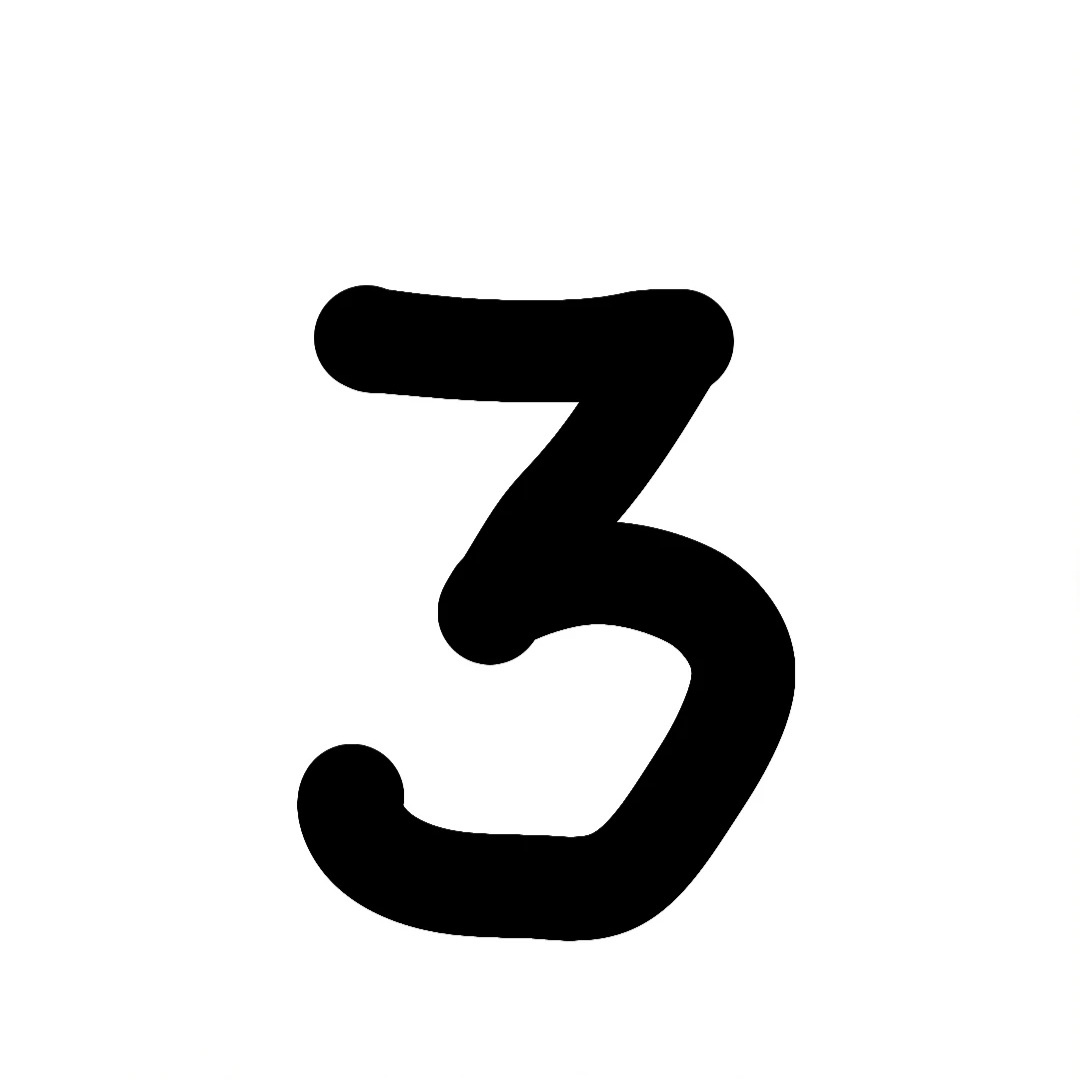

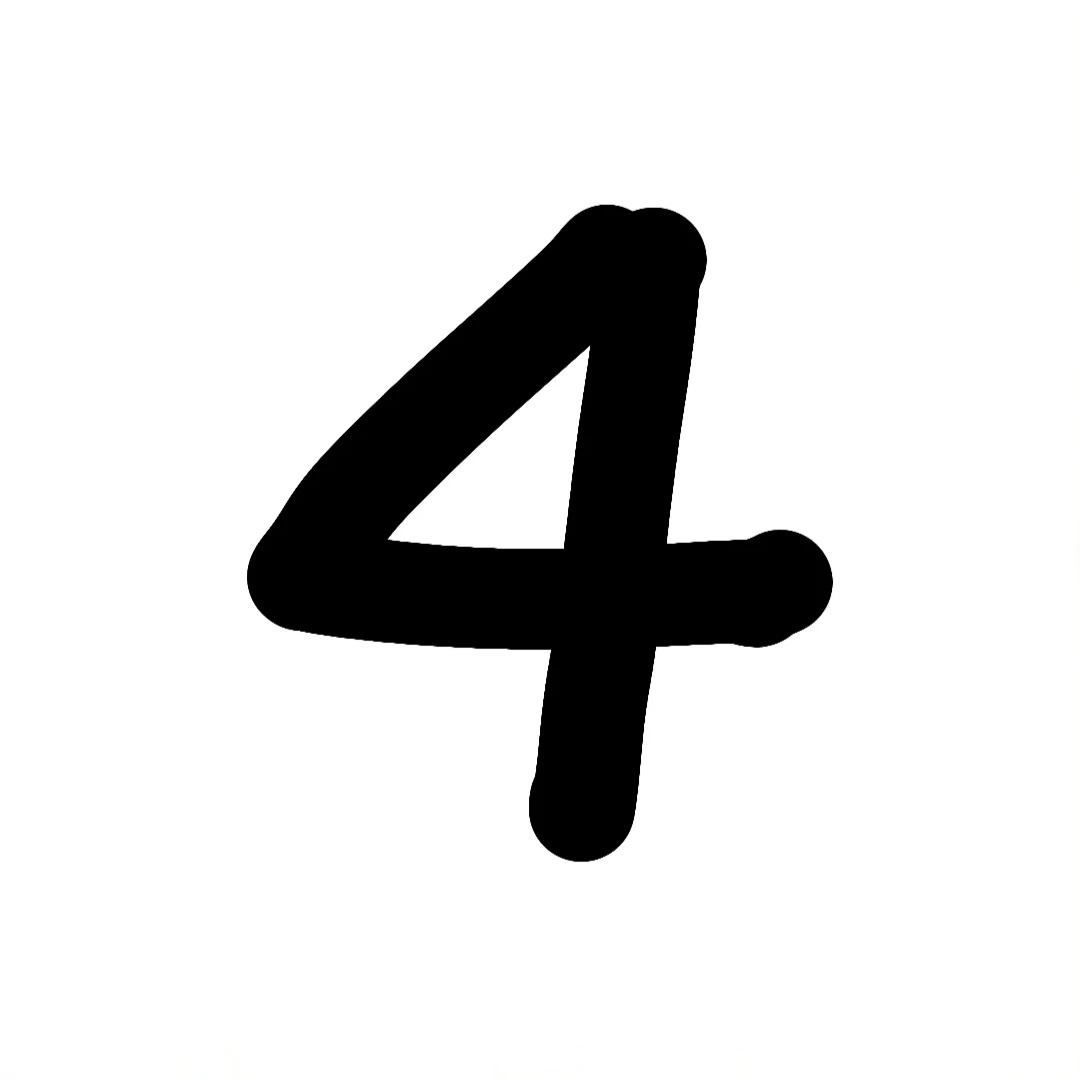

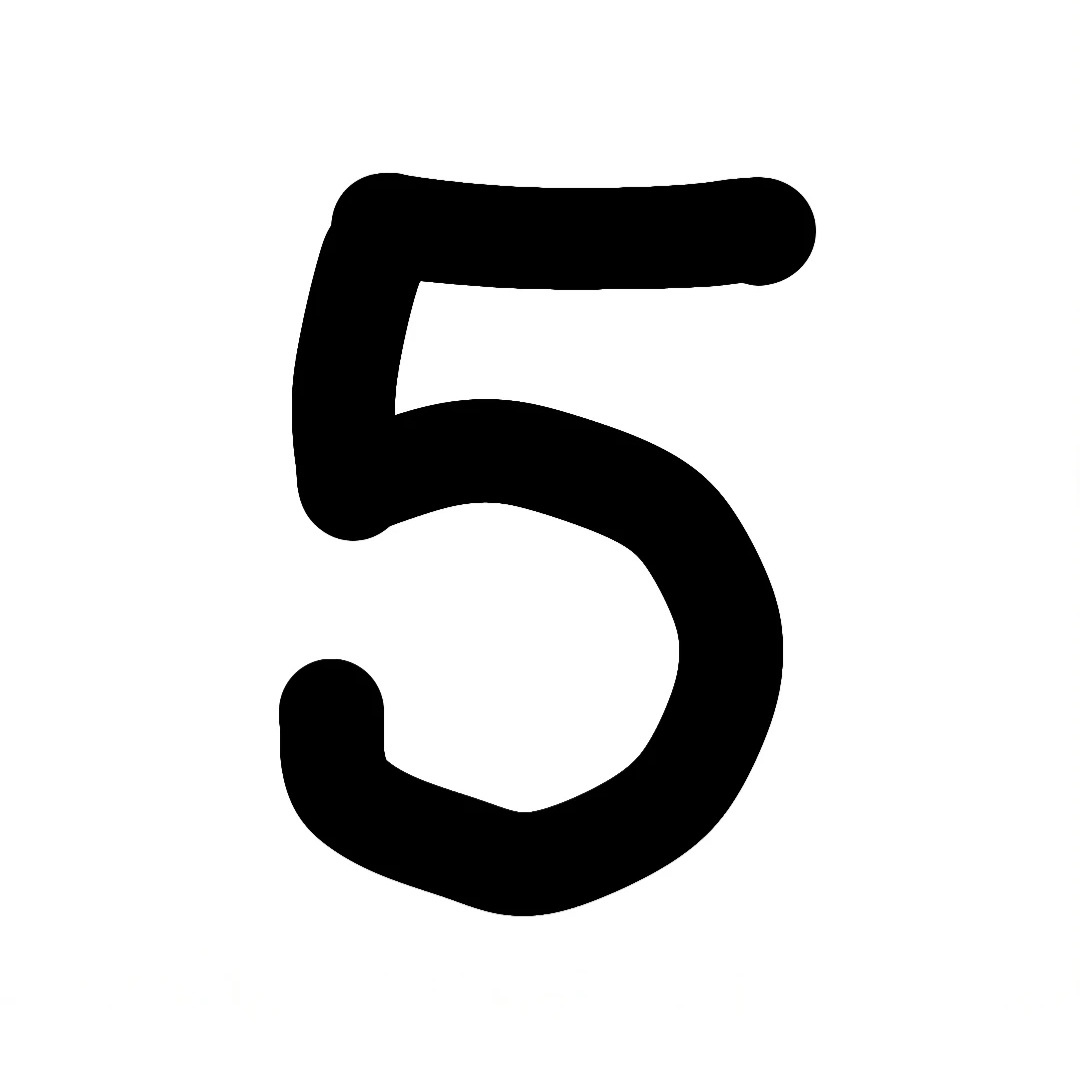

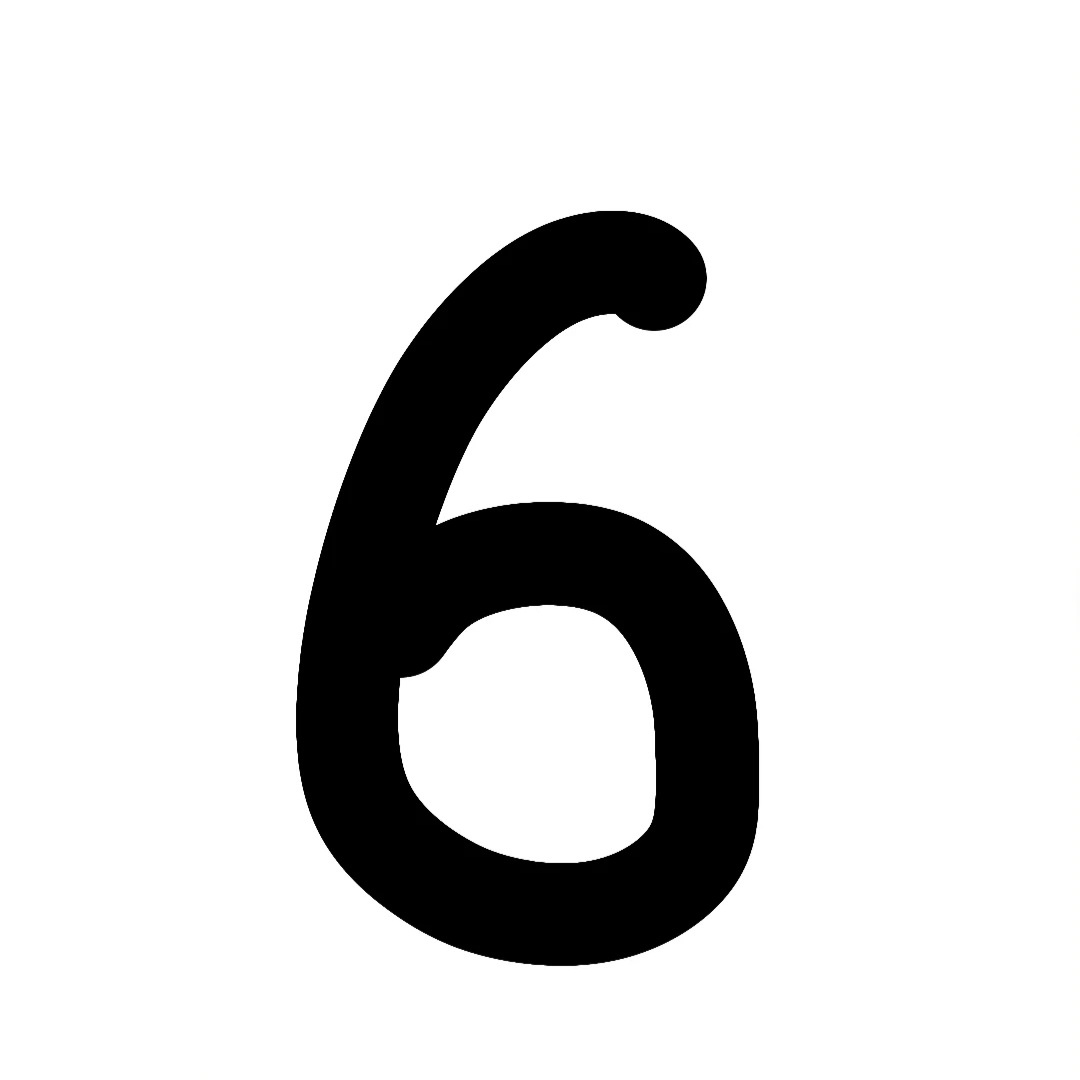

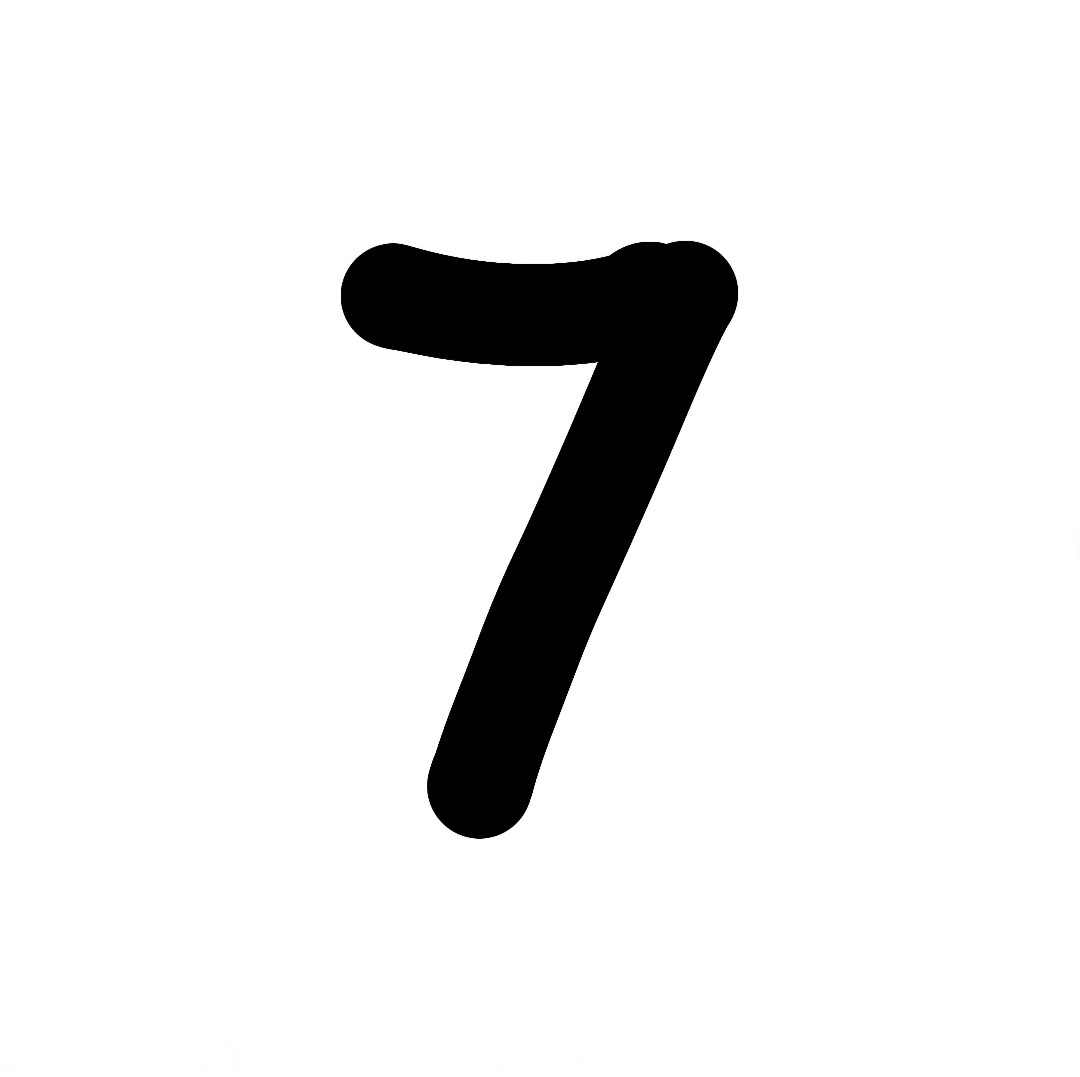

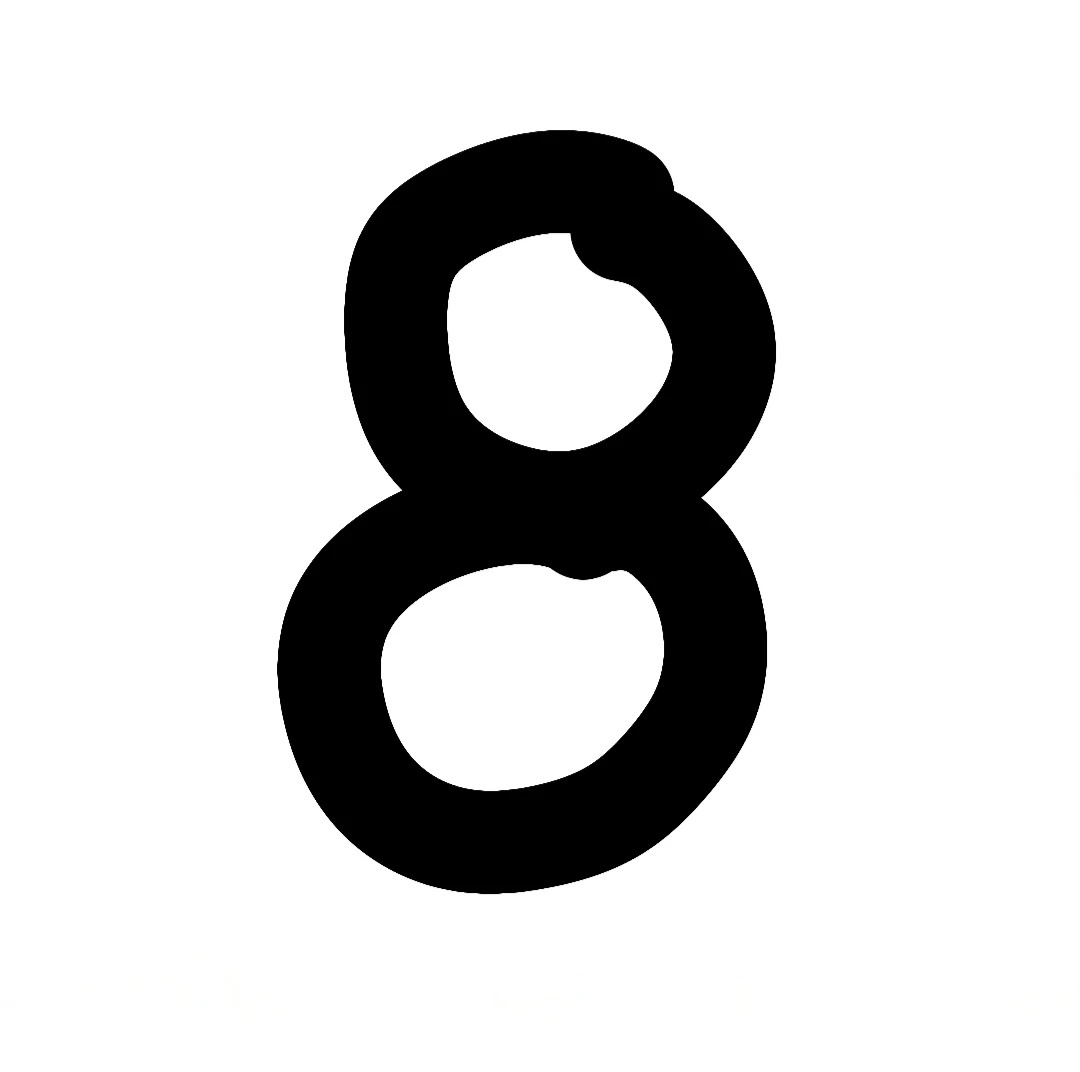

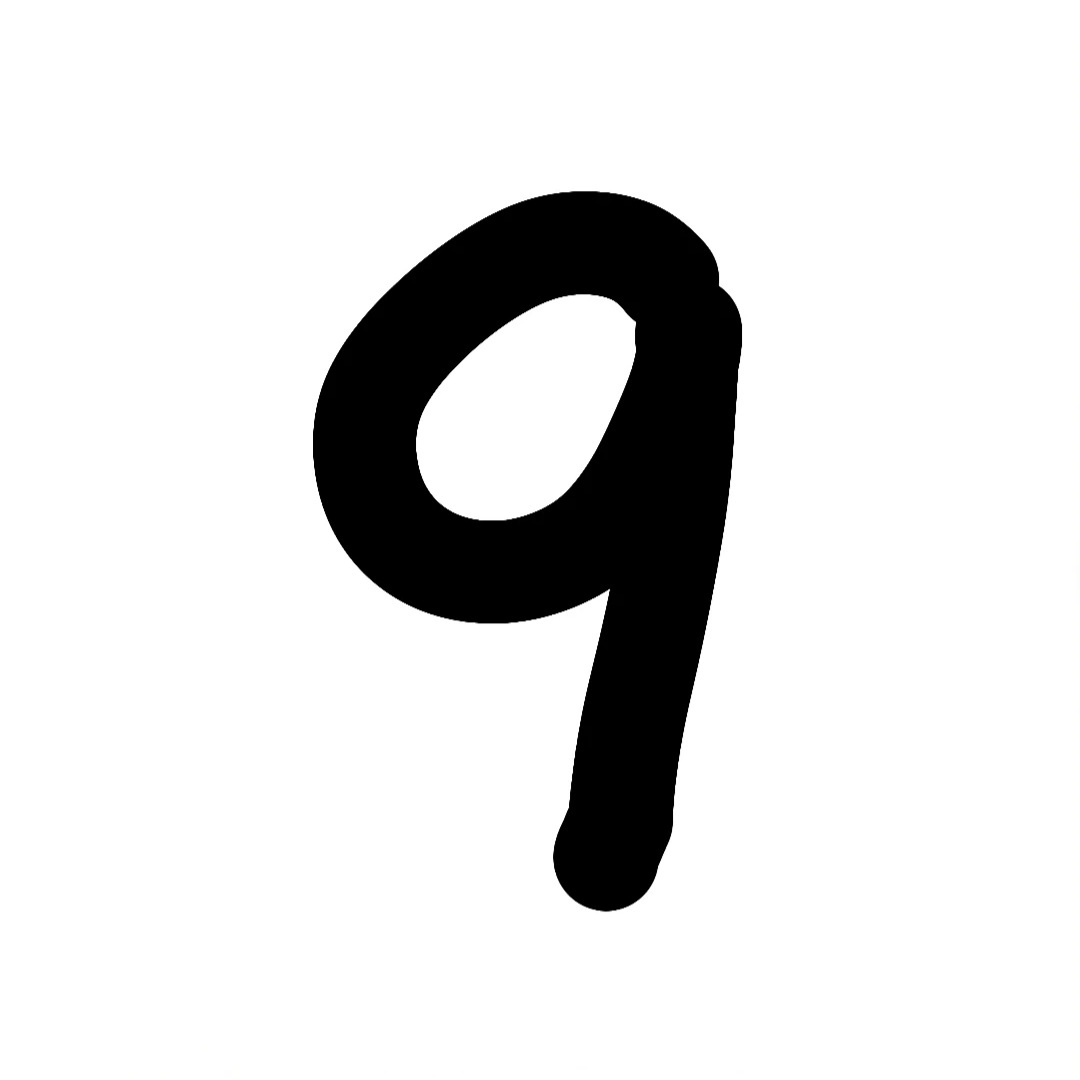

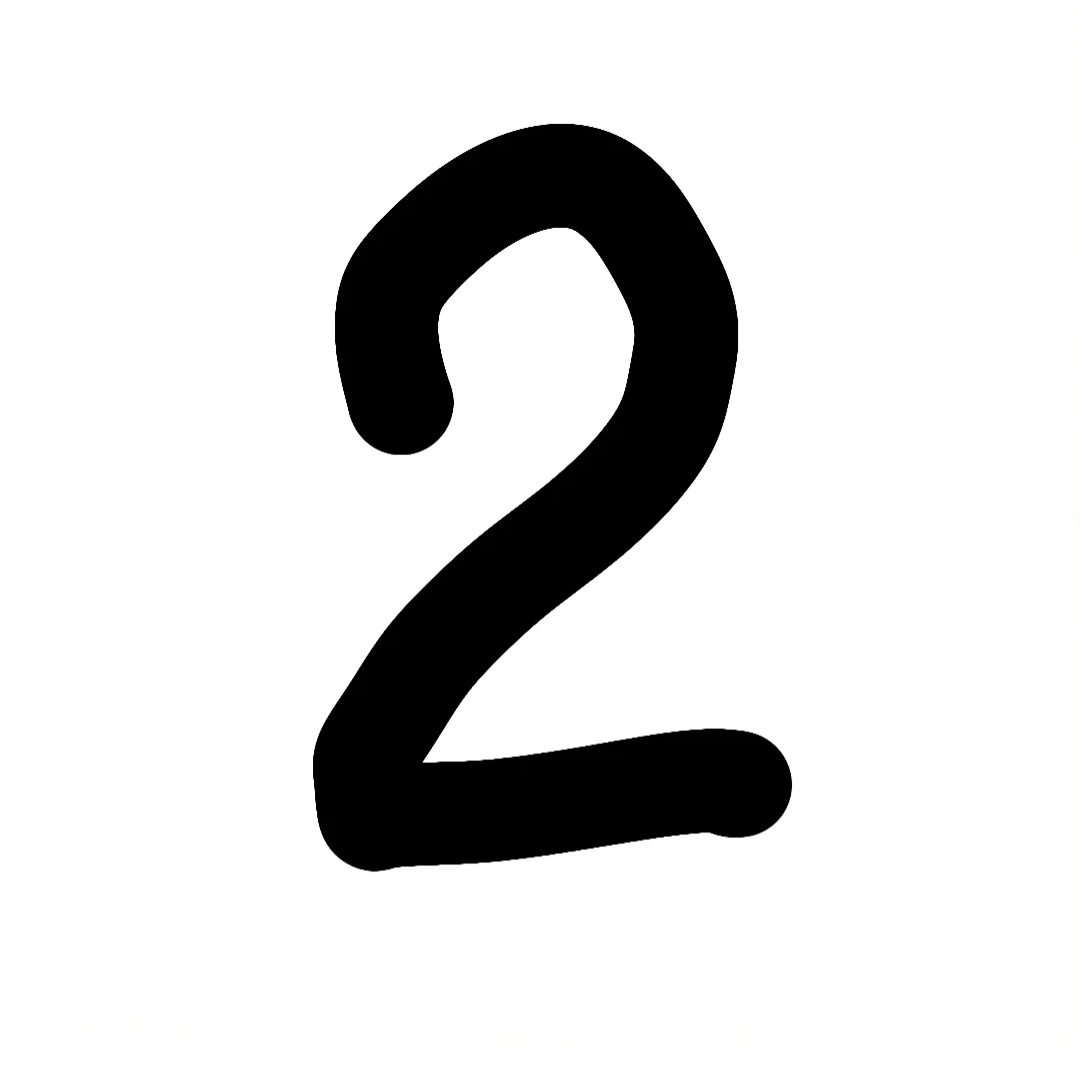

In [ ]:
for img in dig_img :
  cv2_imshow(img)

In [ ]:

# Image directory
folder_path = this_folder + digit_img_rsz_test

def getGrayImage(dig_img, dimension = (28,28)):
  gray_img = []
  for img in dig_img:
    g_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    r_img = cv2.resize(g_img, dimension)
    gray_img.append(r_img)
  return gray_img

name = 'Digit'
gray_img = getGrayImage(dig_img)

def saveImage(folder,name,images) :
  i = 1
  for img in images:
    # Filename
    filename = folder + name + str(i) + '.jpg'
    # Using cv2.imwrite() method
    # Saving the image
    cv2.imwrite(filename, img)
    i = i+1

saveImage(folder_path,name,gray_img)

In [ ]:
for img in gray_img:
  cv2_imshow(img)

In [ ]:
#Defining useful functions to process input

def gray2Dto1D(gray_img_list) :
  oneD_mat = []
  for img in gray_img_list:
    oneD_mat.append(np.ravel(img))
  
  return oneD_mat

t_img = gray2Dto1D(gray_img)


In [ ]:
#The Dataset

#The Data Set used here is taken from Internet for Educational & Demonstration purpose only. The author of this project doesn't claim the ownership of this dataset. The complete ownership of this dataset belongs to the organisation which created this dataset.
#Dataset taken from : (https://www.kaggle.com/code/ngbolin/mnist-dataset-digit-recognizer/input)

#Let's load the dataset to a Pandas DataFrame

# Load the training dataset

df_train = pd.read_csv('/content/drive/MyDrive/Projects/Machine-Learning/Personal-Projects/Digit-Recognizer/Data/digit_recognizer_train_data.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Projects/Machine-Learning/Personal-Projects/Digit-Recognizer/Data/digit_recognizer_test_data.csv')

In [ ]:
df_train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_train.head() # 784 features (pixels), 1 label

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#For training purpose
df_features = df_train.iloc[:, 1:785]
df_label = df_train.iloc[:, 0]

#For Testing/Prediction
X_test = df_test.iloc[:, 0:784]

print(X_test.shape)

(28000, 784)


In [ ]:
X_train, X_cv, y_train, y_cv = train_test_split(df_features, df_label, test_size = 0.2,random_state = 1212)

X_train = X_train.values.reshape(33600,784)

X_cv = X_cv.values.reshape(8400,784)

X_test = X_test.values.reshape(28000, 784)

In [ ]:
print((min(X_train[1]), max(X_train[1])))

(0, 255)


In [ ]:
# Feature Normalization 
X_train = X_train.astype('float32'); X_cv= X_cv.astype('float32'); X_test = X_test.astype('float32')
X_train /= 255; X_cv /= 255; X_test /= 255

# Convert labels to One Hot Encoded
num_digits = 10
y_train = keras.utils.to_categorical(y_train, num_digits)
y_cv = keras.utils.to_categorical(y_cv, num_digits)

In [ ]:
# Printing 2 examples of labels after conversion
print(y_train[0]) # 2
print(y_train[3]) # 7

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


**Model Fitting**

In [ ]:
#Mark this as True to re-train the deep learning model
#Suggestion :- if you already have a saved model then use it, run the below code only when you want to retrain the model
train_model = False

In [ ]:
def trainDLModel(flag = False) :
  if (flag == True):
    # Input Parameters
    n_input = 784 # number of features
    n_hidden_1 = 300
    n_hidden_2 = 100
    n_hidden_3 = 100
    n_hidden_4 = 200
    num_digits = 10

    # Insert Hyperparameters
    learning_rate = 0.1
    training_epochs = 20
    batch_size = 100

    Inp = Input(shape=(784,))
    x = Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1")(Inp)
    x = Dropout(0.3)(x)
    x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
    x = Dropout(0.3)(x)
    x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
    x = Dropout(0.3)(x)
    x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
    output = Dense(num_digits, activation='softmax', name = "Output_Layer")(x)

    # Our model would have '6' layers - input layer, 4 hidden layer and 1 output layer
    model4 = Model(Inp, output)
    model4.summary() # We have 297,910 parameters to estimate

    model4.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    history = model4.fit(X_train, y_train,batch_size = batch_size,epochs = training_epochs,validation_data=(X_cv, y_cv))

    # Saving Model
    model_folder = '/content/drive/MyDrive/Projects/Web-Development/Digit-Recognizer/Model' 
    model_name = 'digit-recognizer-model'
    model_path = model_folder #+ r'/' + model_name
    model4.save(model_path)

    train_model = False

trainDLModel(train_model)


In [ ]:
test_images = np.array([])
for img in t_img :
  img = abs(255 -img)
  img = img/255
  test_images = np.append(test_images,img)

n = len(t_img)
d_2 = len(t_img[0])
test_images = test_images.reshape(n,d_2)

In [ ]:
# Using the saved Model
model_folder = this_folder + 'Model' 
model_path = model_folder

#Storing the saved modle into restore_model - it will be used to predict future results
restore_model = keras.models.load_model(model_path)

test_pred = pd.DataFrame(restore_model.predict(test_images, batch_size=min(n_img,100)))
test_pred = pd.DataFrame(test_pred.idxmax(axis = 1))

#Renaming Index as ImageID
test_pred.index.name = 'ImageID'

#Renaming Column 0 as Label and then readding index column 
test_pred = test_pred.rename(columns = {0: 'Label'}).reset_index()


test_pred['ImageID'] = test_pred['ImageID'] + 1
test_pred.head()
print(test_pred)

10/10 [==============================] - 0s 3ms/step
   ImageID  Label
0        1      1
1        2      0
2        3      3
3        4      4
4        5      5
5        6      6
6        7      7
7        8      8
8        9      9
9       10      2


In [ ]:
labels = np.array(test_pred['Label'])
print(labels)

[1 0 3 4 5 6 7 8 9 2]


In [ ]:
# Saving Images in the directory
def saveImageByID(folder,names,images) :
  limg = len(images)
  lnm = len(names)
  for i in range(min(limg,lnm)):
    # Filename
    filename = folder_path + name +''+ str(names[i]) + '.jpg'
    # Using cv2.imwrite() method
    # Saving the image
    cv2.imwrite(filename, images[i])

# this_folder = '/content/drive/MyDrive/Projects/Web-Development/Digit-Recognizer/'
# digit_img_orig = 'Digits/Original/'
# digit_img_rsz_test = 'Digits/Test-Resize/'
# digit_img_test = 'Digits/Test/'

name = 'Digit-'
#Saving original image in original folder
folder_path = this_folder + digit_img_orig
saveImageByID(folder_path,labels,dig_img)
#Saving Resized Gray Image in Tes-Resize Folder
folder_path = this_folder + digit_img_rsz_test
saveImageByID(folder_path,labels,gray_img)
#Saving Final Labeled image in Test Folder
folder_path = this_folder + digit_img_test
saveImageByID(folder_path,labels,dig_img)